# Telco Customer Churn 

# I. Aim of this project 

The goal of this project is to predict whether a customer is likely to churn based on their personal characteristics and service usage history.
By applying supervised classification techniques, the model helps identify at-risk customers so that proactive retention strategies can be implemented.



# II. Exploratory Data Analysis 

In this section, we load the Telco Customer Churn dataset and perform an initial exploration.
We inspect the data structure, types of variables, and get a first look at the information
available to predict customer churn. This step helps us understand the dataset and plan
the necessary preprocessing.



In [3]:
# Basic configuration
import pandas as pd
import numpy as np
import warnings 

# Eliminating the warnings messages
warnings.filterwarnings("ignore")


file_path = 'C:/Users/pt.makoundou/OneDrive - CRITEO/Documents/Personal ML Projects/Telco-Customer-Churn.csv'
churn = pd.read_csv(file_path)
churn.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.info()
churn.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We use `churn.info()` to get a summary of the dataset, including the number of non-null values
and data types for each feature. This helps identify missing values and understand the data structure.

Then, `churn.describe()` provides basic statistical summaries for numerical variables,
such as mean, standard deviation, min and max values, which gives insight into data distribution.


<Axes: xlabel='Churn', ylabel='count'>

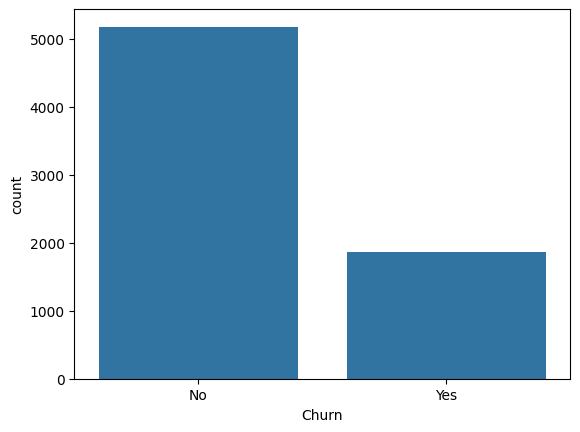

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=churn)



We visualize the class distribution of the target variable `Churn` to check for class imbalance. This plot shows how many customers have churned versus those who have stayed. 

In [6]:
churn['Churn'].value_counts (normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

From the distribution, approximately 26.5% of customers have churned, while 73.5% have not. This indicates a class imbalance that could bias the model towards predicting the majority class ('No'). To address this, we will apply oversampling techniques like SMOTE during the modeling phase to help the classifier better learn patterns from the minority class.


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

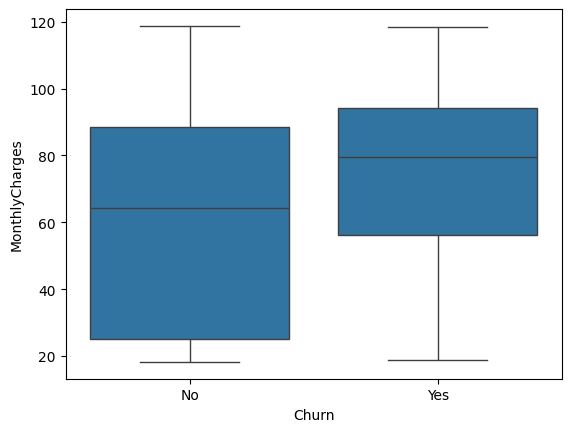

In [7]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn)

Customers who churn generally have higher monthly charges compared to those who stay. This suggests that high-paying customers might be more sensitive to perceived value or service quality, making them more likely to leave if dissatisfied.


# III. Cleaning the data 

In [8]:
# Convert TotalCharges
churn['TotalCharges'] = pd.to_numeric(churn ['TotalCharges'], errors='coerce')

# Delete missing values 
churn = churn.dropna()

# Encoding the data so that we can train the model 
churn_encoded = pd.get_dummies(churn.drop('customerID', axis=1), drop_first=True)


- The `TotalCharges` column was converted to numeric format. Any non-convertible values were turned into NaN.
- These missing values were then dropped from the dataset to avoid issues during training.
- The dataset was encoded using one-hot encoding to convert categorical variables into numerical format. We dropped the first level of each categorical variable to avoid multicollinearity.


# IV. Model

In [9]:
!pip install scikit-learn


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = churn_encoded.drop('Churn_Yes', axis=1)
y = churn_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))



[[1379  170]
 [ 293  268]]


True Negatives (TN): 1383 — correctly predicted non-churners

True Positives (TP): 268 — correctly predicted churners

False Positives (FP): 166 — predicted churn when the customer actually stayed

False Negatives (FN): 293 — predicted stay when the customer actually churned

This indicates that the model is currently missing a significant number of actual churners (high number of false negatives), resulting in a relatively low recall.

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.89      0.86      1549
        True       0.61      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



Precision (Churn = True) = 0.62 : Of all customers predicted as churners, 62% are actually churners.

Recall (Churn = True) = 0.48 : The model only identifies 48% of the actual churners.

F1-score = 0.54 : Harmonic mean of precision and recall, indicating a low balance between the two.

The model performs well at detecting non-churners but misses a significant portion of actual churners, which is critical from a business perspective.
This highlights the need to improve recall using techniques like SMOTE.



# V. Optimization 

The dataset shows a significant class imbalance: most customers did not churn, while a smaller proportion did. This imbalance can bias the model toward predicting the majority class, reducing its ability to detect churners.
To address this, we apply SMOTE (Synthetic Minority Over-sampling Technique). SMOTE generates synthetic examples of the minority class by interpolating between existing samples. This helps balance the dataset and allows the model to better learn the patterns associated with churned customers.

In [12]:
!pip install imbalanced-learn


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Drop the 'customerID' column
churn_cleaned = churn.drop(columns=['customerID'])

# 2. Convert the target 'Churn' into binary values
churn_cleaned['Churn'] = churn_cleaned['Churn'].map({'Yes': 1, 'No': 0})

# 3. Separate features and target
X_raw = churn_cleaned.drop(columns=['Churn'])
y = churn_cleaned['Churn']

# 4. Encode categorical variables using one-hot encoding
X = pd.get_dummies(X_raw, drop_first=True)

# 5. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution before and after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

# 7. Train a Random Forest model on the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# 8. Evaluate the model on the test set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


Before SMOTE: Counter({0: 4130, 1: 1495})
After SMOTE: Counter({0: 4130, 1: 4130})
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.59      0.58       374

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



After addressing class imbalance with SMOTE, the model shows notable improvement in detecting churners. The recall for the churn class (customers who actually left) increased from 0.48 to 0.59, meaning the model became better at identifying true churners. This is especially important in churn prediction tasks, where missing a potential churner (false negative) can be more costly than mistakenly flagging a loyal customer (false positive).

However, precision remains moderate at 0.58, suggesting that some customers are wrongly predicted to churn. This trade-off is expected when prioritizing recall, and can be justified in a business context where proactive retention efforts (like discounts or support) are less costly than losing high-value customers.

Overall, by balancing the dataset and optimizing for recall, the model becomes more useful for churn mitigation strategies — helping the business take preventive actions before customers actually leave.

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Display the confusion matrix
print(cm)


[[872 161]
 [153 221]]


This confusion matrix shows that the model correctly predicted 872 customers who did not churn (true negatives) and correctly identified 221 churners (true positives). However, it also misclassified 161 customers as churners when they actually stayed (false positives), and failed to identify 153 actual churners (false negatives).

In summary, the model successfully identified 221 churners but missed 153 of them. It also predicted 161 false churns, which could lead to unnecessary retention actions such as offering discounts to customers who would have stayed anyway. These results reflect a tradeoff: the model achieves a higher recall (it catches more churners) at the cost of lower precision (more false alarms). If the business goal is to proactively retain at-risk customers, this tradeoff can be acceptable—assuming that the cost of taking action on false positives is lower than the cost of losing true churners.

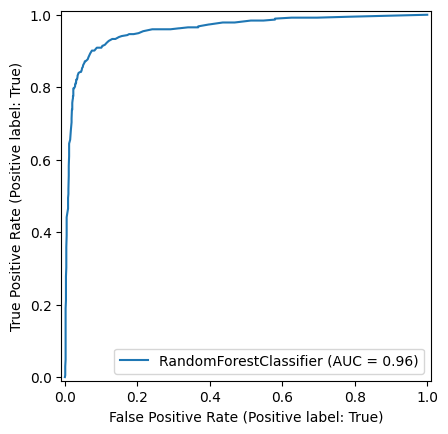

<Axes: >

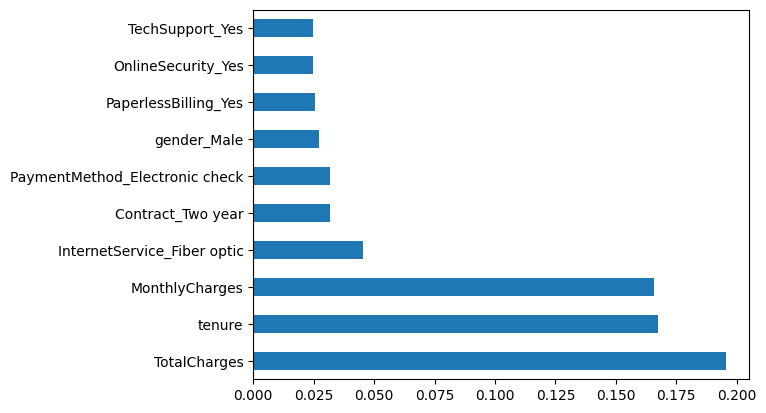

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

# Importance des features
importances = model.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
features[:10].plot(kind='barh')
